In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

C:\Users\weezs\Anaconda3\envs\minjoo\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('data/diabetes.csv')
df[:5]

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
X = df.values[:,:-1]
y = df.values[:,-1]
attrs = df.columns[:-1]

In [4]:
corr_mat = np.empty((len(attrs),len(attrs)))
for i in range(len(attrs)):
    for j in range(len(attrs)):
        corr_mat[i,j] = pearsonr(X[:,i],X[:,j])[0]

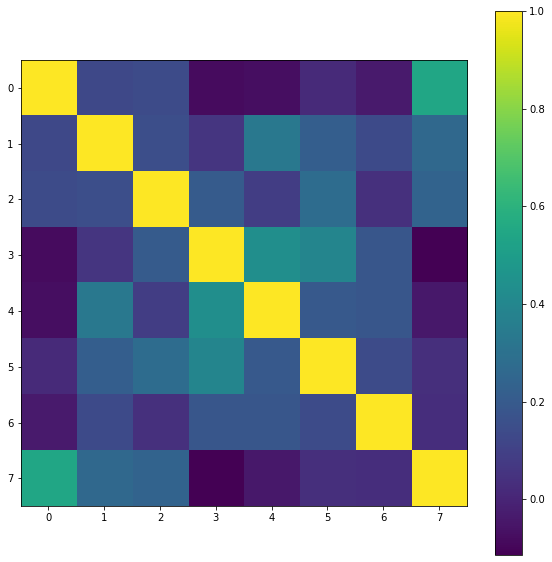

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(corr_mat)
plt.colorbar()
plt.show()

In [6]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             random_state=0)
cv = KFold(n_splits=10, shuffle=True, random_state=0)
print(cross_val_score(clf, X, y, cv=cv).mean())

0.6966678058783322


Attribute Selection

In [8]:
# 0번째 Attribute를 빼겠다.
reduced_X = np.delete(X, obj=0, axis=1)
print(cross_val_score(clf, reduced_X, y, cv=cv).mean())

# 결론 : 상관계수가 높은 Attribute는 빼주는 것이 연산속도나 모델의 정확도 측면에서 좋다!!

0.7044941900205057
